
# 1. Data Preprocessing
# 1.1 Load the Dataset


In [229]:
#Student1 Name : Ali Halayqa    ID : 1201769  Sec : 1
#Student2 Name : Mohammad Shreteh    ID : 1201369  Sec : 3

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


# Load the dataset
print("Loading dataset...")
df = pd.read_csv('cars.csv')

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())


Loading dataset...
First 5 rows of the dataset:
                           car name                 price engine_capacity  \
0           Fiat 500e 2021 La Prima                   TBD             0.0   
1     Peugeot Traveller 2021 L3 VIP           SAR 140,575             2.0   
2  Suzuki Jimny 2021 1.5L Automatic            SAR 98,785             1.5   
3    Ford Bronco 2021 2.3T Big Bend           SAR 198,000             2.3   
4     Honda HR-V 2021 1.8 i-VTEC LX  Orangeburst Metallic             1.8   

        cylinder horse_power  top_speed     seats    brand country  
0  N/A, Electric      Single  Automatic       150     fiat     ksa  
1              4         180   8 Seater       8.8  peugeot     ksa  
2              4         102        145  4 Seater   suzuki     ksa  
3              4         420   4 Seater       7.5     ford     ksa  
4              4         140        190  5 Seater    honda     ksa  


#1.2 Check for missing value before data preprocessing




In [230]:
# Check for missing values
print("\nMissing values in each column from dataset:")
missing_values = df.isnull().sum()
print(missing_values)


Missing values in each column from dataset:
car name             0
price                0
engine_capacity      0
cylinder           624
horse_power          0
top_speed            0
seats                0
brand                0
country              0
dtype: int64


# data cleaning

In [231]:
# convert to numeric and handle errors
df["horse_power"] = pd.to_numeric(df["horse_power"], errors='coerce')

# remove rows that don't contain 'Seater'
df['seats'] = df['seats'].apply(lambda x: x if isinstance(x, str) and 'Seater' in x else np.nan)

# convert to numeric and handle errors
df["cylinder"] = pd.to_numeric(df["cylinder"], errors='coerce')

# convert to numeric and handle errors
df["top_speed"] = pd.to_numeric(df["top_speed"], errors='coerce')

# convert to numeric and handle errors
df["engine_capacity"] = pd.to_numeric(df["engine_capacity"], errors='coerce')

# Handle missing values for numeric columns by replacing NaNs with column means/median
df["top_speed"].fillna(df["top_speed"].mean(), inplace=True)
df["horse_power"].fillna(df["horse_power"].mean(), inplace=True)
df["cylinder"].fillna(df["cylinder"].mean(), inplace=True)
df["engine_capacity"].fillna(df["engine_capacity"].median(), inplace=True)

# Handle missing values in 'seats' by replacing NaNs with the mode (most frequent value)
df["seats"].fillna(df["seats"].mode()[0], inplace=True)


<ipython-input-231-dfd2f58fe11d>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["top_speed"].fillna(df["top_speed"].mean(), inplace=True)
<ipython-input-231-dfd2f58fe11d>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

# 1.2 Handle Missing Values

In [232]:
# Check for missing values
print("\nMissing values in each column from dataset:")
missing_values = df.isnull().sum()
print(missing_values)

# Drop rows with any missing values
df = df.dropna()

# Verify that no missing values remain
print("\nMissing values after cleaning:")
missing_values_after = df.isnull().sum()
print(missing_values_after)



Missing values in each column from dataset:
car name           0
price              0
engine_capacity    0
cylinder           0
horse_power        0
top_speed          0
seats              0
brand              0
country            0
dtype: int64

Missing values after cleaning:
car name           0
price              0
engine_capacity    0
cylinder           0
horse_power        0
top_speed          0
seats              0
brand              0
country            0
dtype: int64


# 1.3 convert price to usd and scale

In [233]:
import pandas as pd
import numpy as np
import re

# check column price exist
if 'price' not in df.columns:
    raise ValueError("The dataset does not contain a 'price' column.")

# Function to extract currency and numerical price
def extract_currency_price(x):
    if isinstance(x, str):
        # Extract currency
        currency_match = re.findall(r'[A-Za-z]+', x)
        currency = currency_match[0].upper() if currency_match else 'USD'

        # Extract numerical price
        price_match = re.findall(r'[\d,.]+', x)
        if price_match:
            price_str = price_match[0].replace(',', '')
            try:
                price_value = float(price_str)
            except ValueError:
                price_value = np.nan
        else:
            price_value = np.nan

        return pd.Series([currency, price_value])
    else:
        return pd.Series(['USD', np.nan])

# Apply the extraction function
df[['currency', 'price_value']] = df['price'].apply(extract_currency_price)

# Drop rows with invalid price values (e.g., 'TBD')
df = df.dropna(subset=['price_value'])

# Define currency conversion rates
currency_mapping = {
    'USD': 1,
    'AED': 0.27,    # 1 AED = 0.27 USD
    'SAR': 0.2664,  # 1 SAR = 0.2664 USD
    'QAR':  0.27,    # 1 QAR = 0.27 USD
    'OMR': 2.60 , # 1 OMR = 2.60 USD
    'KWD': 3.25 , # 1 KWD = 3.25 USD
    'BHD': 2.65,  # 1 BHD = 2.65 USD
}

# Function to convert price to USD
def convert_to_usd(row):
    rate = currency_mapping.get(row['currency'], np.nan)  # Use NaN if currency not found
    return row['price_value'] * rate if pd.notna(rate) else np.nan

# Apply the conversion
df['price_usd'] = df.apply(convert_to_usd, axis=1)

# Drop rows where conversion was not possible (e.g., unknown currencies)
df = df.dropna(subset=['price_usd'])

# Count and print the number of valid prices
remaining_prices_count = df.shape[0]
print(f"Number of valid prices after dropping: {remaining_prices_count}")

# Print the first 100 converted prices
print("First 100 Converted Prices in USD:")
print(df['price_usd'].head(100))

# Drop unnecessary columns
df = df.drop(['price_value', 'currency'], axis=1)

# Define 'price_usd' as the target variable
target = 'price_usd'

Number of valid prices after dropping: 4684
First 100 Converted Prices in USD:
1       37449.1800
2       26316.3240
3       52747.2000
5       25397.2440
6       22069.9080
          ...     
136     17125.5240
137     78787.5336
138     11215.4400
139     29012.2920
140    162314.8560
Name: price_usd, Length: 100, dtype: float64


<ipython-input-233-8c47b9f5fe5b>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_usd'] = df.apply(convert_to_usd, axis=1)


# 1.4 Encode Categorical Variables with Frequency Encoding


In [234]:
# Identify categorical columns
categorical_col = df.select_dtypes(include=['object']).columns.tolist()
if target in categorical_col:
    categorical_col.remove(target)

# Function to reduce categories to top N
def reduce_to_top_categories(df, column, top_n=10):
    top_categories = df[column].value_counts().nlargest(top_n).index
    df[column] = df[column].apply(lambda x: x if x in top_categories else 'Other')
    return df

# Reduce categories and apply frequency encoding
def apply_frequency(df, column):
    frequency = df[column].value_counts(normalize=True)
    df[column] = df[column].map(frequency)
    return df

for column in categorical_col:
    if df[column].nunique() > 10:
        df = reduce_to_top_categories(df, column, top_n=10)
        print(f"Reduced categories in '{column}' to top 10 and 'Other'.")
    df = apply_frequency(df, column)
    print(f"Applied Frequency Encoding to '{column}'.")

Reduced categories in 'car name' to top 10 and 'Other'.
Applied Frequency Encoding to 'car name'.
Reduced categories in 'price' to top 10 and 'Other'.
Applied Frequency Encoding to 'price'.
Reduced categories in 'seats' to top 10 and 'Other'.
Applied Frequency Encoding to 'seats'.
Reduced categories in 'brand' to top 10 and 'Other'.
Applied Frequency Encoding to 'brand'.
Applied Frequency Encoding to 'country'.


# 1.5 Scale Numerical Features


In [235]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features
features_numeric = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
features_numeric .remove(target)

# Convert numerical columns to float32
for column in features_numeric :
    df[column] = df[column].astype(np.float32)


scaler = StandardScaler()

df[features_numeric ] = scaler.fit_transform(df[features_numeric ])

# Verify data types after scaling
print("\nData types of numerical columns after scaling:")

for col in features_numeric:
    print(f"Column '{col}' has data type: {df[col].dtype}")


Data types of numerical columns after scaling:
Column 'car name' has data type: float32
Column 'price' has data type: float32
Column 'engine_capacity' has data type: float32
Column 'cylinder' has data type: float32
Column 'horse_power' has data type: float32
Column 'top_speed' has data type: float32
Column 'seats' has data type: float32
Column 'brand' has data type: float32
Column 'country' has data type: float32


# 1.6 Remove Duplicated and Highly Correlated Features


In [236]:
# Separate features and target
target = 'price_usd'
X_original = df.drop(target, axis=1)
y_original = df[target].values


# Remove duplicated columns
dup_columns = X_original.columns[X_original.T.duplicated()].tolist()
if dup_columns:
    X_original = X_original.drop(columns=dup_columns)
    print(f"Dropped the duplicated columns: {dup_columns}")
else:
    print("No duplicated columns")


matrix_correlated = X_original.corr().abs()
upper = matrix_correlated.where(np.triu(np.ones(matrix_correlated.shape), k=1).astype(bool))
drop_feature = [column for column in upper.columns if any(upper[column] > 0.95)]
if drop_feature:
    X_original = X_original.drop(columns=drop_feature)
    print(f"Dropped highly correlated features: {drop_feature}")
else:
    print("No highly correlated features found.")

No duplicated columns
No highly correlated features found.


# 1.7 Split the Dataset into Training, Validation, and Test Sets


In [237]:
from sklearn.model_selection import train_test_split

# Combine features and target into a single DataFrame
dataset = X_original.copy()  # Make a copy of the original features
dataset[target] = y_original

# Initial split: 60% training, 40% remaining
train_set, temp_set = train_test_split(dataset, test_size=0.4, random_state=42)

# Further split the remaining 40%: 20% validation, 20% testing
val_set, test_set = train_test_split(temp_set, test_size=0.5, random_state=42)

# Save the datasets to CSV files
train_set.to_csv('train_data.csv', index=False)
val_set.to_csv('validation_data.csv', index=False)
test_set.to_csv('test_data.csv', index=False)

print("\nDataset split completed. Files saved: 'train_data.csv', 'validation_data.csv', 'test_data.csv'.")



Dataset split completed. Files saved: 'train_data.csv', 'validation_data.csv', 'test_data.csv'.


# 2. Building Regression Models
# 2.1 Load Preprocessed Data

In [238]:
# Load preprocessed datasets
train_data = pd.read_csv('train_data.csv')
validation_data = pd.read_csv('validation_data.csv')
test_data = pd.read_csv('test_data.csv')

# Separate features and target
X_training = train_data.drop(target, axis=1).values
y_training = train_data[target].values

X_val = validation_data.drop(target, axis=1).values
y_val = validation_data[target].values

X_test = test_data.drop(target, axis=1).values
y_test = test_data[target].values


# 2.2 Define Regression Models
# 2.2.1 Linear Regression - Closed-form Solution
  

In [258]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Linear Regression using Closed-form Solution
class LinearRegressionModelClosedForm:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fiting(self, X, y):
        # Add bias term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        # Closed-form solution using pseudo-inverse
        theta_best = np.linalg.pinv(X_b).dot(y)
        self.bias = theta_best[0]
        self.weights = theta_best[1:]

    def pred(self, X):
        return X.dot(self.weights) + self.bias

# Train the model
linear_cf = LinearRegressionModelClosedForm()
linear_cf.fiting(X_training, y_training)
y_pred_cf = linear_cf.pred(X_val)

# Calculate metrics
mse_val = mean_squared_error(y_val, y_pred_cf)
mae_val = mean_absolute_error(y_val, y_pred_cf)
r2 = r2_score(y_val, y_pred_cf)

# Scaling MSE and MAE
mse = mse_val / np.var(y_val)
range_y = np.max(y_val) - np.min(y_val)
mae = mae_val / range_y

# Print metrics
print("Linear Regression (Closed-form) Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R2 Score: {r2:.4f}")


Linear Regression (Closed-form) Metrics:
Mean Squared Error (MSE): 0.6872
Mean Absolute Error (MAE): 0.0082
R2 Score: 0.3128


# Scaling the features using MinMaxScaler

In [240]:
from sklearn.preprocessing import MinMaxScaler


# Scaling the features using MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Scale the features
X_train_scaled = scaler.fit_transform(X_training)  # Scale training features
X_val_scaled = scaler.transform(X_val)  # Apply scaling to validation features

# Optionally, scale the target variable
target_scaler = MinMaxScaler(feature_range=(-1, 1))
y_train_scaled = target_scaler.fit_transform(y_training.reshape(-1, 1)).flatten()  # Scale target for training
y_val_scaled = target_scaler.transform(y_val.reshape(-1, 1)).flatten()  # Scale target for validation

# # 2.2.2 Linear Regression - Gradient Descent


In [259]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Linear Regression using Gradient Descent
class GradientDescentLinearRegressor:
    def __init__(self, lr=0.01, epochs=1000, gradient_clip=1.0):
        self.lr = lr
        self.epochs = epochs
        self.gradient_clip = gradient_clip
        self.coefficients = None
        self.intercept = None

    def fit(self, features, target):
        n_samples, n_features = features.shape
        # Initialize weights and bias
        self.coefficients = np.zeros(n_features)
        self.intercept = 0

        # Gradient Descent Loop
        for epoch in range(self.epochs):
            # Predictions
            predictions = features.dot(self.coefficients) + self.intercept
            # Compute gradients
            gradient_weights = (1 / n_samples) * features.T.dot(predictions - target)
            gradient_bias = (1 / n_samples) * np.sum(predictions - target)
            # Clip gradients
            gradient_weights = np.clip(gradient_weights, -self.gradient_clip, self.gradient_clip)
            gradient_bias = np.clip(gradient_bias, -self.gradient_clip, self.gradient_clip)
            # Update weights and bias
            self.coefficients -= self.lr * gradient_weights
            self.intercept -= self.lr * gradient_bias

    def predict(self, features):
        return features.dot(self.coefficients) + self.intercept

# Train the model
gd_regressor = GradientDescentLinearRegressor(lr=0.01, epochs=10000)
gd_regressor.fit(X_train_scaled, y_train_scaled)
y_predicted_scaled = gd_regressor.predict(X_val_scaled)

# Evaluate model performance
mse_val = mean_squared_error(y_val_scaled, y_predicted_scaled)
mae_val = mean_absolute_error(y_val_scaled, y_predicted_scaled)
r2_val = r2_score(y_val_scaled, y_predicted_scaled)

# Output the metrics
print("\nLinear Regression (Gradient Descent) Performance:")
print(f"Mean Squared Error (MSE): {mse_val:.4f}")
print(f"Mean Absolute Error (MAE): {mae_val:.4f}")
print(f"R² Score: {r2_val:.4f}")



Linear Regression (Gradient Descent) Performance:
Mean Squared Error (MSE): 0.0123
Mean Absolute Error (MAE): 0.0277
R² Score: 0.3189


# 2.2.3 LASSO Regression

In [242]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("\nTuning and fitting the LASSO Regression model...")

# Automatically tune alpha using cross-validation with LassoCV
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train_scaled)

# Get the best alpha value from cross-validation
best_alpha = lasso_cv.alpha_

print(f"Best Alpha from LassoCV: {best_alpha:.4f}")

# Fit the LASSO model with the best alpha
lasso_model = Lasso(alpha=best_alpha, max_iter=10000)
lasso_model.fit(X_train_scaled, y_train_scaled)

# Make predictions on the validation set
lasso_predictions = lasso_model.predict(X_val_scaled)

# Calculate metrics
mse_lasso_val = mean_squared_error(y_val_scaled, lasso_predictions)
mae_lasso_val = mean_absolute_error(y_val_scaled, lasso_predictions)
r2_lasso_val = r2_score(y_val_scaled, lasso_predictions)

# Print the LASSO regression metrics
print("LASSO Regression Metrics with Best Alpha:")
print(f"Mean Squared Error (MSE): {mse_lasso_val:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lasso_val:.4f}")
print(f"R2 Score: {r2_lasso_val:.4f}")


Tuning and fitting the LASSO Regression model...
Best Alpha from LassoCV: 0.0015
LASSO Regression Metrics with Best Alpha:
Mean Squared Error (MSE): 0.0135
Mean Absolute Error (MAE): 0.0273
R2 Score: 0.2546


# 2.2.4 Ridge Regression

In [243]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train Ridge Regression
print("\nTraining Ridge Regression...")
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train_scaled)
y_pred_ridge = ridge_model.predict(X_val_scaled)

# Calculate metrics
mse_ridge_val = mean_squared_error(y_val_scaled, y_pred_ridge)
mae_ridge_val = mean_absolute_error(y_val_scaled, y_pred_ridge)
r2_ridge_val = r2_score(y_val_scaled, y_pred_ridge)

print("Ridge Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse_ridge_val:.4f}")
print(f"Mean Absolute Error (MAE): {mae_ridge_val:.4f}")
print(f"R2 Score: {r2_ridge_val:.4f}")



Training Ridge Regression...
Ridge Regression Metrics:
Mean Squared Error (MSE): 0.0124
Mean Absolute Error (MAE): 0.0265
R2 Score: 0.3172


# Train Polynomial Regression for degrees 2 to 10

In [244]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

# Train Polynomial Regression for degrees 2 to 10
print("\nTraining Polynomial Regression (Degrees 2 to 10)...")
optimal_degree = None
lowest_mse = float('inf')

for degree in range(2, 11):
    print(f"\nEvaluating Polynomial Regression for Degree {degree}...")

    # Generate polynomial features
    poly_transformer = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly_features = poly_transformer.fit_transform(X_train_scaled)  # Apply scaling to transformed features
    X_val_poly_features = poly_transformer.transform(X_val_scaled)  # Apply scaling to transformed features

    # Train Linear Regression on transformed features
    linear_model = LinearRegression()  # Using LinearRegression instead of LinearRegressionModelClosedForm()
    linear_model.fit(X_train_poly_features, y_train_scaled)

    # Make predictions
    predictions = linear_model.predict(X_val_poly_features)

    # Compute metrics
    mse = mean_squared_error(y_val_scaled, predictions)
    mae = mean_absolute_error(y_val_scaled, predictions)
    r2 = r2_score(y_val_scaled, predictions)

    print(f"Degree {degree} Metrics:")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  R² Score: {r2:.4f}")

    # Update the best polynomial degree if necessary
    if mse < lowest_mse:
        optimal_degree = degree
        lowest_mse = mse
        optimal_mae = mae
        optimal_r2 = r2

# Output the best polynomial regression model results
print(f"\nOptimal Polynomial Degree: {optimal_degree}")
print(f"Metrics for the Best Model:")
print(f"  Best MSE: {lowest_mse:.4f}")
print(f"  Best MAE: {optimal_mae:.4f}")
print(f"  Best R² Score: {optimal_r2:.4f}")



Training Polynomial Regression (Degrees 2 to 10)...

Evaluating Polynomial Regression for Degree 2...
Degree 2 Metrics:
  Mean Squared Error (MSE): 0.0084
  Mean Absolute Error (MAE): 0.0257
  R² Score: 0.5340

Evaluating Polynomial Regression for Degree 3...
Degree 3 Metrics:
  Mean Squared Error (MSE): 0.0462
  Mean Absolute Error (MAE): 0.0231
  R² Score: -1.5502

Evaluating Polynomial Regression for Degree 4...
Degree 4 Metrics:
  Mean Squared Error (MSE): 79141411862309104.0000
  Mean Absolute Error (MAE): 16418791.7381
  R² Score: -4372824029111917056.0000

Evaluating Polynomial Regression for Degree 5...
Degree 5 Metrics:
  Mean Squared Error (MSE): 215081640640457312.0000
  Mean Absolute Error (MAE): 21917917.8733
  R² Score: -11883970026333628416.0000

Evaluating Polynomial Regression for Degree 6...
Degree 6 Metrics:
  Mean Squared Error (MSE): 2313489505203.4014
  Mean Absolute Error (MAE): 146086.6928
  R² Score: -127827925499387.5625

Evaluating Polynomial Regression for 

# scaler the feature

In [245]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))  # Min-Max Scaler for features
X_training_scaled = scaler.fit_transform(X_training)
X_val_scaled = scaler.transform(X_val)

target_scaler = MinMaxScaler(feature_range=(-1, 1))  # Min-Max Scaler for the target variable
y_training_scaled = target_scaler.fit_transform(y_training.reshape(-1, 1)).flatten()
y_val_scaled = target_scaler.transform(y_val.reshape(-1, 1)).flatten()

# # 2.2.6 Radial Basis Function (RBF) Regression


In [246]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Train RBF Regression
print("\nTraining Radial Basis Function (RBF) Regression...")
rbf_feature = RBFSampler(gamma=1, n_components=50, random_state=42)
X_train_rbf = rbf_feature.fit_transform(X_training_scaled)  # Apply scaling before RBF transformation
X_rbf = rbf_feature.transform(X_val_scaled)  # Apply scaling before RBF transformation

# Fit linear regression on RBF features
rbf_reg = LinearRegression()  # Using LinearRegression instead of LinearRegressionModelClosedForm()
rbf_reg.fit(X_train_rbf, y_training_scaled)

# Predict on validation set
y_pred_rbf = rbf_reg.predict(X_rbf)

# Calculate metrics
mse_rbf_val = mean_squared_error(y_val_scaled, y_pred_rbf)
mae_rbf_val = mean_absolute_error(y_val_scaled, y_pred_rbf)
r2_rbf_val = r2_score(y_val_scaled, y_pred_rbf)

# Output RBF Regression metrics
print("RBF Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse_rbf_val:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rbf_val:.4f}")
print(f"R² Score: {r2_rbf_val:.4f}")



Training Radial Basis Function (RBF) Regression...
RBF Regression Metrics:
Mean Squared Error (MSE): 0.0128
Mean Absolute Error (MAE): 0.0316
R² Score: 0.2933


# 3. Summary of Model Performance

In [260]:
# Compile metrics into a dictionary
metrics_dict = {
    'Model': ['Linear_CF', 'Linear_GD', 'LASSO', 'Ridge', f'Polynomial_Degree_{optimal_degree}', 'RBF'],
    'MSE': [mse, mse_val, mse_lasso_val, mse_ridge_val, lowest_mse, mse_rbf_val],
    'MAE': [mae, mae_val, mae_lasso_val, mae_ridge_val, optimal_mae, mae_rbf_val],
    'R2 Score': [r2, r2_val, r2_lasso_val, r2_ridge_val, optimal_r2, r2_rbf_val]
}

# Create a DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Display the metrics
print("\nModel Performance on Validation Set:")
print(metrics_df)


Model Performance on Validation Set:
                 Model       MSE       MAE  R2 Score
0            Linear_CF  0.687152  0.008224  0.312848
1            Linear_GD  0.012328  0.027733  0.318856
2                LASSO  0.013491  0.027298  0.254553
3                Ridge  0.012358  0.026462  0.317185
4  Polynomial_Degree_2  0.008433  0.025749  0.534038
5                  RBF  0.012790  0.031634  0.293311


# 4. Feature Selection with Forward Selection

In [248]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("\nStarting Forward Feature Selection...")

# Initialize variables
remaining_features = list(range(X_training_scaled.shape[1]))
selected_features = []
best_mse = float('inf')

while remaining_features:
    best_feature = None

    for feature in remaining_features:
        # Evaluate with the current feature
        features_to_try = selected_features + [feature]
        X_train_fs = X_training_scaled[:, features_to_try]
        X_val_fs = X_val_scaled[:, features_to_try]

        # Train and validate the model
        model = LinearRegressionModelClosedForm()
        model.fiting(X_train_fs, y_training_scaled)
        mse = mean_squared_error(y_val_scaled, model.pred(X_val_fs))

        if mse < best_mse:
            best_mse = mse
            best_feature = feature

    if best_feature is not None:
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        print(f"Added feature index {best_feature}, MSE: {best_mse:.4f}")
    else:
        print("No further improvement, stopping feature selection.")
        break

# Display results
print("\nSelected features after forward selection:")
print(selected_features)

# Retrain model with selected features
X_train_fs = X_training_scaled[:, selected_features]
X_val_fs = X_val_scaled[:, selected_features]

model_fs = LinearRegressionModelClosedForm()
model_fs.fiting(X_train_fs, y_training_scaled)
y_pred_fs = model_fs.pred(X_val_fs)

metrics_performance = {
    "MSE": mean_squared_error(y_val_scaled, y_pred_fs),
    "MAE": mean_absolute_error(y_val_scaled, y_pred_fs),
    "R² Score": r2_score(y_val_scaled, y_pred_fs)
}

print("\nForward Selection Model Metrics:")
for metric, value in metrics_performance.items():
    print(f"{metric}: {value:.4f}")




Starting Forward Feature Selection...
Added feature index 4, MSE: 0.0137
Added feature index 3, MSE: 0.0130
Added feature index 5, MSE: 0.0126
Added feature index 2, MSE: 0.0125
Added feature index 7, MSE: 0.0125
Added feature index 6, MSE: 0.0124
Added feature index 8, MSE: 0.0124
Added feature index 0, MSE: 0.0124
Added feature index 1, MSE: 0.0124

Selected features after forward selection:
[4, 3, 5, 2, 7, 6, 8, 0, 1]

Forward Selection Model Metrics:
MSE: 0.0124
MAE: 0.0266
R² Score: 0.3128


# 5. Applying Regularization Techniques
# 5.1 LASSO Regression with Grid Search

In [249]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler


def best_alph_lasso(X_train, y_train, alpha_values, cv_folds=5):

    # Initialize LASSO model with a high number of iterations
    lasso = Lasso(max_iter=10000)

    param_grid = {'alpha': alpha_values}


    grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=cv_folds, scoring='neg_mean_squared_error', n_jobs=-1)

    # Perform Grid Search
    grid_search.fit(X_train, y_train)
    BestAlpha = grid_search.best_params_['alpha']
    print(f"Best alpha found: {BestAlpha}")
    return BestAlpha


def traningModel(X_train, y_train, alpha):

    trainLasso = Lasso(alpha=alpha, max_iter=10000)
    trainLasso.fit(X_train, y_train)
    return trainLasso

# Evaluate the Model
def modelEvaluate(model, X_val, y_val):

    predic = model.predict(X_val)

    # Calculate metrics
    mse = mean_squared_error(y_val, predic)
    mae = mean_absolute_error(y_val, predic)
    r2 = r2_score(y_val, predic)

    print("LASSO Regression Performance on Validation Set:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R2) Score: {r2:.4f}")

def main():

    print("\nApplying LASSO Regression with Grid Search...")

    alpha_values = [0.01, 0.1, 1, 10, 100]
    BestAlpha = best_alph_lasso(X_training_scaled, y_training_scaled, alpha_values)
    best_lasso_model = traningModel(X_training_scaled, y_training_scaled, BestAlpha)
    modelEvaluate(best_lasso_model, X_val_scaled, y_val_scaled)

if __name__ == "__main__":
    main()




Applying LASSO Regression with Grid Search...
Best alpha found: 0.01
LASSO Regression Performance on Validation Set:
Mean Squared Error (MSE): 0.0155
Mean Absolute Error (MAE): 0.0355
R-squared (R2) Score: 0.1433


# 5.2 Ridge Regression with Grid Search

In [250]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the Pipeline for Ridge
pipeline = Pipeline([
    ('scaler', MinMaxScaler(feature_range=(-1, 1))),
    ('ridge', Ridge())  # Ridge regression model
])

param_grid = {'ridge__alpha': [0.01, 0.1, 1, 10, 100] }

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1 )

print("\nApplying Ridge Regression with Grid Search using Pipeline...")
grid_search.fit(X_training_scaled, y_training_scaled)

# Best alpha found through GridSearchCV
BestRigeAlpha = grid_search.best_params_['ridge__alpha']
print(f"Best alpha for Ridge Regression: {BestRigeAlpha}")


y_ridge_best = grid_search.predict(X_val_scaled)

# Evaluate the Model on the Validation Set
mse_ridge = mean_squared_error(y_val_scaled, y_ridge_best)
mae_ridge = mean_absolute_error(y_val_scaled, y_ridge_best)
r2_ridge = r2_score(y_val_scaled, y_ridge_best)

print("\nBest Ridge Regression Metrics on Validation Set:")
print(f"Mean Squared Error (MSE): {mse_ridge:.4f}")
print(f"Mean Absolute Error (MAE): {mae_ridge:.4f}")
print(f"R-squared (R²) Score: {r2_ridge:.4f}")



Applying Ridge Regression with Grid Search using Pipeline...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best alpha for Ridge Regression: 100

Best Ridge Regression Metrics on Validation Set:
Mean Squared Error (MSE): 0.0140
Mean Absolute Error (MAE): 0.0296
R-squared (R²) Score: 0.2272


# Scaler the test data feature

In [251]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scalers for features and target variable
scaler = MinMaxScaler(feature_range=(-1, 1))
target_scaler = MinMaxScaler(feature_range=(-1, 1))

# Scale features and target in a more compact manner
X_training_scaled, X_val_scaled, X_test_scaled = (
    scaler.fit_transform(X_training),
    scaler.transform(X_val),
    scaler.transform(X_test)
)

y_training_scaled, y_val_scaled, y_test_scaled = (
    target_scaler.fit_transform(y_training.reshape(-1, 1)).flatten(),
    target_scaler.transform(y_val.reshape(-1, 1)).flatten(),
    target_scaler.transform(y_test.reshape(-1, 1)).flatten()
)


In [252]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

print("\nHyperparameter Tuning for Linear Regression (Gradient Descent)...")

# Define the hyperparameters to tune
params = {'learning_rate': [0.001, 0.005, 0.01, 0.05], 'epochs': [1000, 5000, 10000] }

best_mse = float('inf')
best_params = {}
best_gd = None


for lir in params['learning_rate']:
    for num_epochs in params['epochs']:
        print(f"Training with learning_rate={lir}, epochs={num_epochs}")

        linear_grad = GradientDescentLinearRegressor(lr=lir, epochs=num_epochs)

        # Fit the model
        linear_grad.fit(X_training_scaled, y_training_scaled)
        y_pred_gd = linear_grad.predict(X_val_scaled)

        # Calculate the Mean Squared Error (MSE)
        mse_grad = mean_squared_error(y_val_scaled, y_pred_gd)

        # Update the best parameters
        if mse_grad < best_mse:
            best_mse = mse_grad
            best_params = {'learning_rate': lir, 'epochs': num_epochs}
            best_linear_gd = linear_grad  # Save the best model

print(f"\nBest parameters for Linear Regression (Gradient Descent): {best_params}")
print(f"Best MSE on Validation Set: {best_mse:.4f}")

# Evaluate the best model on the test set
print("\nEvaluating the Best Model on Test Set...")

y_test_pred = best_linear_gd.predict(X_test_scaled)

# Calculate performance
mse_li_test = mean_squared_error(y_test_scaled, y_test_pred)
mae_li_test = mean_absolute_error(y_test_scaled, y_test_pred)
r2_li_test = r2_score(y_test_scaled, y_test_pred)

print(f"Test Set Performance of the Best Linear Regression Model:")
print(f"MSE: {mse_li_test:.4f}")
print(f"MAE: {mae_li_test:.4f}")
print(f"R2 Score: {r2_li_test:.4f}")


Hyperparameter Tuning for Linear Regression (Gradient Descent)...
Training with learning_rate=0.001, epochs=1000
Training with learning_rate=0.001, epochs=5000
Training with learning_rate=0.001, epochs=10000
Training with learning_rate=0.005, epochs=1000
Training with learning_rate=0.005, epochs=5000
Training with learning_rate=0.005, epochs=10000
Training with learning_rate=0.01, epochs=1000
Training with learning_rate=0.01, epochs=5000
Training with learning_rate=0.01, epochs=10000
Training with learning_rate=0.05, epochs=1000
Training with learning_rate=0.05, epochs=5000
Training with learning_rate=0.05, epochs=10000

Best parameters for Linear Regression (Gradient Descent): {'learning_rate': 0.05, 'epochs': 5000}
Best MSE on Validation Set: 0.0123

Evaluating the Best Model on Test Set...
Test Set Performance of the Best Linear Regression Model:
MSE: 0.0036
MAE: 0.0235
R2 Score: 0.5653


# 6.2 Polynomial Regression

In [253]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("\nHyperparameter Tuning for Polynomial Regression...")

# Hyperparameter for tuning
Polynomial_params = {'degree': list(range(2, 7))}


best_polynomial_mse = float('inf')
best_polynomial_params = {}


for degree in Polynomial_params['degree']:
    print(f"Training Polynomial Regression with degree={degree}")

    # Apply Polynomial Features transformation
    polynomial = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_polynomial = polynomial.fit_transform(X_training_scaled)
    X_val_polynomial = polynomial.transform(X_val_scaled)

    # Fit linear regression on polynomial features
    linear_reg = LinearRegressionModelClosedForm()
    linear_reg.fiting(X_train_polynomial, y_training_scaled)

    y_pred_poly = linear_reg.pred(X_val_polynomial)
    mse_polynomial = mean_squared_error(y_val_scaled, y_pred_poly)

    # Check for the best model
    if mse_polynomial < best_poly_mse:
        best_poly_mse = mse_polynomial
        best_poly_params = {'degree': degree}
        best_poly_mae = mean_absolute_error(y_val_scaled, y_pred_poly)
        best_poly_r2 = r2_score(y_val_scaled, y_pred_poly)
        best_poly_model = linear_reg
        best_poly = polynomial

# Output best hyperparameters and performance
print(f"Best degree for Polynomial Regression: {best_poly_params['degree']}")
print(f"Best MSE: {best_poly_mse:.4f}")
print(f"Best MAE: {best_poly_mae:.4f}")
print(f"Best R2 Score: {best_poly_r2:.4f}")


print("\nEvaluating the Best Polynomial Regression Model on Test Set...")
X_test_poly = best_poly.transform(X_test_scaled)
y_test_pred_poly = best_poly_model.pred(X_test_poly)

# Calculate performance metrics on the test set
mse_test_polynomial = mean_squared_error(y_test_scaled, y_test_pred_poly)
mae_test_polynomial = mean_absolute_error(y_test_scaled, y_test_pred_poly)
r2_test_polynomial = r2_score(y_test_scaled, y_test_pred_poly)

print(f"Test Set Performance of the Best Polynomial Regression Model:")
print(f"MSE: {mse_test_polynomial:.4f}")
print(f"MAE: {mae_test_polynomial:.4f}")
print(f"R2 Score: {r2_test_polynomial:.4f}")


Hyperparameter Tuning for Polynomial Regression...
Training Polynomial Regression with degree=2
Training Polynomial Regression with degree=3
Training Polynomial Regression with degree=4
Training Polynomial Regression with degree=5
Training Polynomial Regression with degree=6
Best degree for Polynomial Regression: 2
Best MSE: 0.0084
Best MAE: 0.0258
Best R2 Score: 0.5341

Evaluating the Best Polynomial Regression Model on Test Set...
Test Set Performance of the Best Polynomial Regression Model:
MSE: 0.0038
MAE: 0.0250
R2 Score: 0.5400


# 6.3 RBF Regression


Hyperparameter Tuning for RBF Regression...
Training RBF Regression with gamma=0.01, n_components=50
Training RBF Regression with gamma=0.01, n_components=100
Training RBF Regression with gamma=0.01, n_components=200
Training RBF Regression with gamma=0.1, n_components=50
Training RBF Regression with gamma=0.1, n_components=100
Training RBF Regression with gamma=0.1, n_components=200
Training RBF Regression with gamma=1, n_components=50
Training RBF Regression with gamma=1, n_components=100
Training RBF Regression with gamma=1, n_components=200
Training RBF Regression with gamma=10, n_components=50
Training RBF Regression with gamma=10, n_components=100
Training RBF Regression with gamma=10, n_components=200

Best parameters for RBF Regression: {'gamma': 0.1, 'n_components': 100}
Best MSE: 0.0068
Best MAE: 0.0237
Best R2 Score: 0.6224

Evaluating the Best Model on Test Set...
Test Set Performance of the Best RBF Regression Model:
MSE: 0.0037
MAE: 0.0243
R2 Score: 0.5429


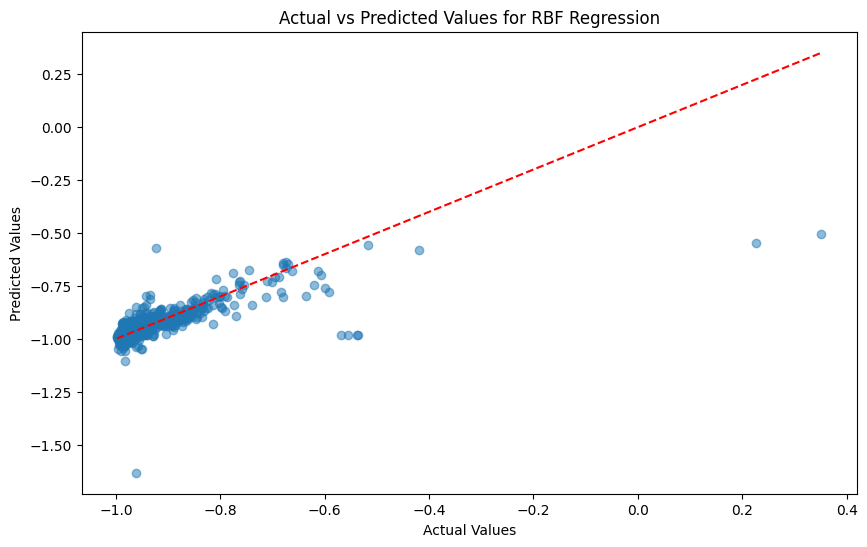

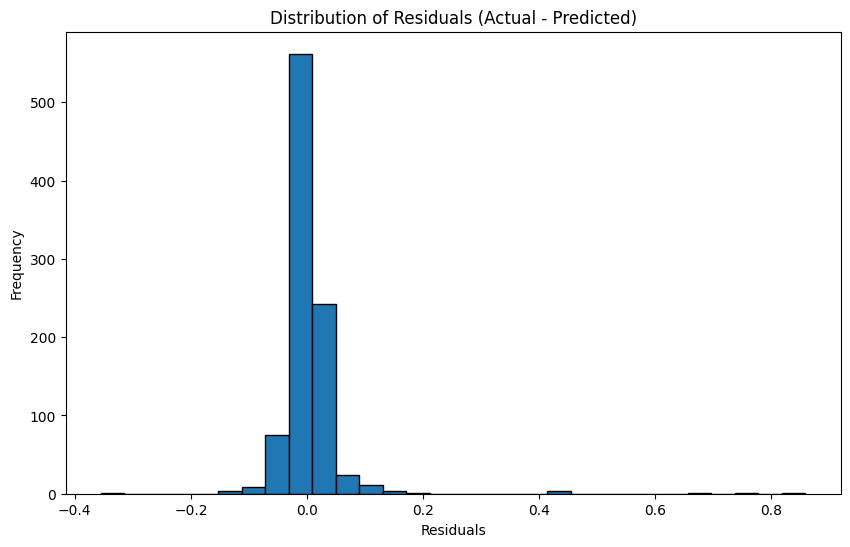

In [254]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_approximation import RBFSampler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

results = []

print("\nHyperparameter Tuning for RBF Regression...")

# Define hyperparameter grid for tuning
rbf_params = {
    'gamma': [0.01, 0.1, 1, 10],
    'n_components': [50, 100, 200]
}

best_RBF_mse = float('inf')
best_RBF_params = {}

# Hyperparameter tuning loop
for gamma in rbf_params['gamma']:
    for n_comp in rbf_params['n_components']:
        print(f"Training RBF Regression with gamma={gamma}, n_components={n_comp}")

        # Apply RBFSampler to map features to a higher-dimensional space
        rbf_feature = RBFSampler(gamma=gamma, n_components=n_comp, random_state=42)
        X_train_rbf = rbf_feature.fit_transform(X_training_scaled)  # Ensure X_training_scaled is pre-scaled
        X_val_rbf = rbf_feature.transform(X_val_scaled)  # Ensure X_val_scaled is pre-scaled

        # Initialize and fit the linear regression model
        rbf_reg = LinearRegression()  # Use scikit-learn's LinearRegression
        rbf_reg.fit(X_train_rbf, y_training_scaled)  # Ensure y_training_scaled is pre-scaled

        # Predict on validation set
        y_pred_rbf = rbf_reg.predict(X_val_rbf)

        # Calculate metrics
        mse_rbf = mean_squared_error(y_val_scaled, y_pred_rbf)
        mae_rbf = mean_absolute_error(y_val_scaled, y_pred_rbf)
        r2_rbf = r2_score(y_val_scaled, y_pred_rbf)

        # Store the results
        results.append({
            'gamma': gamma,
            'n_components': n_comp,
            'MSE': mse_rbf,
            'MAE': mae_rbf,
            'R2': r2_rbf
        })

        # Update best parameters if current MSE is lower
        if mse_rbf < best_RBF_mse:
            best_RBF_mse = mse_rbf
            best_RBF_params = {'gamma': gamma, 'n_components': n_comp}
            best_rbf_mae = mae_rbf
            best_rbf_r2 = r2_rbf
            best_rbf_model = rbf_reg
            best_rbf_feature = rbf_feature

print(f"\nBest parameters for RBF Regression: {best_RBF_params}")
print(f"Best MSE: {best_RBF_mse:.4f}")
print(f"Best MAE: {best_rbf_mae:.4f}")
print(f"Best R2 Score: {best_rbf_r2:.4f}")

print("\nEvaluating the Best Model on Test Set...")

# Transform test set using the best RBF feature transformer
X_test_rbf = best_rbf_feature.transform(X_test_scaled)

# Predict on the scaled test set
y_test_pred_rbf = best_rbf_model.predict(X_test_rbf)

# Calculate performance metrics on the test set
mse_test_RBF = mean_squared_error(y_test_scaled, y_test_pred_rbf)
mae_test_RBF = mean_absolute_error(y_test_scaled, y_test_pred_rbf)
r2_test_RBF = r2_score(y_test_scaled, y_test_pred_rbf)

print(f"Test Set Performance of the Best RBF Regression Model:")
print(f"MSE: {mse_test_RBF:.4f}")
print(f"MAE: {mae_test_RBF:.4f}")
print(f"R2 Score: {r2_test_RBF:.4f}")

# Visualization of Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_scaled, y_test_pred_rbf, alpha=0.5)
plt.plot([min(y_test_scaled), max(y_test_scaled)], [min(y_test_scaled), max(y_test_scaled)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for RBF Regression')
plt.show()

# Visualization of Residuals (errors)
residuals = y_test_scaled - y_test_pred_rbf
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Actual - Predicted)')
plt.show()

# 7. Model Evaluation on Test Set


Evaluating the Best Polynomial Regression Model on Test Set...

Test Set Performance of the Best Polynomial Regression Model (Degree 2):
MSE: 0.0011
MAE: 0.0163
R2 Score: 0.6455


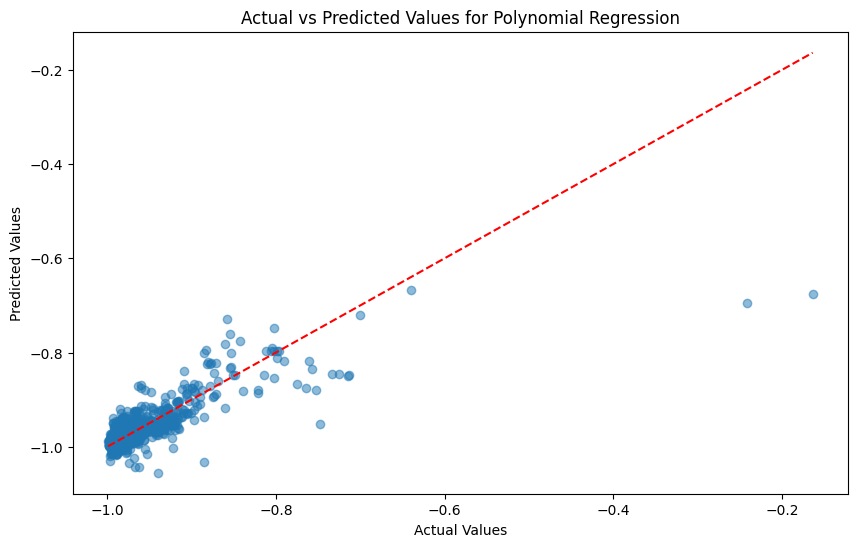

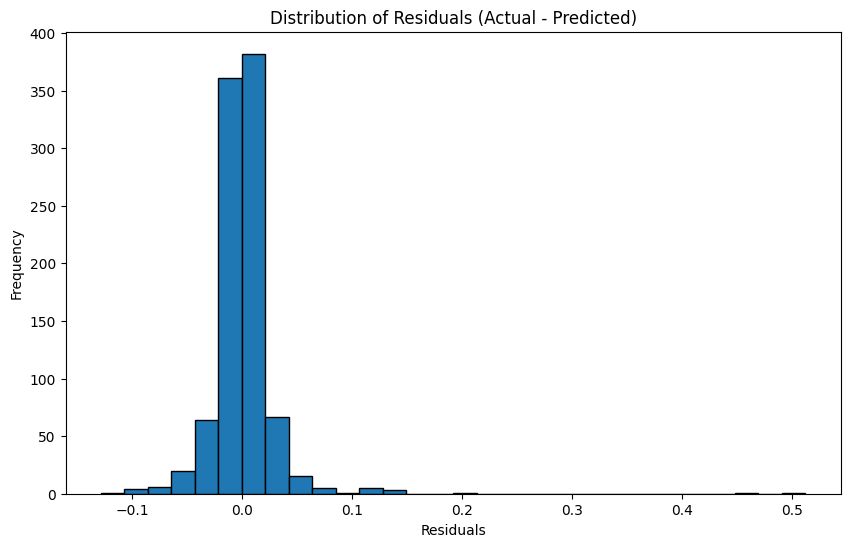

In [255]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

print("\nEvaluating the Best Polynomial Regression Model on Test Set...")

# Scaling the features and target variable
scaler = MinMaxScaler(feature_range=(-1, 1))
X_trainf = np.vstack((X_training, X_val))
y_train_full = np.concatenate((y_training, y_val))

# Scaling training and test features
X_train_fullScaled = scaler.fit_transform(X_trainf)
X_test_scaled = scaler.transform(X_test)

# Apply the best polynomial degree
best_polynomial_full = PolynomialFeatures(degree=best_poly_params['degree'], include_bias=False)
X_train_poly_full = best_polynomial_full.fit_transform(X_train_fullScaled)
X_test_polynomial = best_polynomial_full.transform(X_test_scaled)

# Scale the target variable
target_scaler = MinMaxScaler(feature_range=(-1, 1))
y_train_full_scaled = target_scaler.fit_transform(y_train_full.reshape(-1, 1)).flatten()
y_test_scaled = target_scaler.transform(y_test.reshape(-1, 1)).flatten()

# Train a linear regression model
linier_reg = LinearRegression()
linier_reg.fit(X_train_poly_full, y_train_full_scaled)

# Make predictions
y_test_prediction = linier_reg.predict(X_test_polynomial)

# Evaluate on the test set for Polynomial Regression
mse_test_val = mean_squared_error(y_test_scaled, y_test_prediction)
mae_test_val = mean_absolute_error(y_test_scaled, y_test_prediction)
r2_test_val = r2_score(y_test_scaled, y_test_prediction)

# Display the evaluation metrics
print(f"\nTest Set Performance of the Best Polynomial Regression Model (Degree {best_poly_params['degree']}):")
print(f"MSE: {mse_test_val:.4f}")
print(f"MAE: {mae_test_val:.4f}")
print(f"R2 Score: {r2_test_val:.4f}")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test_scaled, y_test_prediction, alpha=0.5)
plt.plot([min(y_test_scaled), max(y_test_scaled)], [min(y_test_scaled), max(y_test_scaled)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Polynomial Regression')
plt.show()


residuals = y_test_scaled - y_test_prediction
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Actual - Predicted)')
plt.show()